In this notebook, we evaluate the trained neural networks. The first part uses the large scale network, and the second is based on its mobile version.

## Speaker verification using large-scale neural embedding network.

In [1]:
from own_library.speaker_identificationTF import SpeakerIdentificationTf
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

identification = SpeakerIdentificationTf(**{"enrollment_folder": "libri_train/enrollment_folder",
                                            "data_folder": "libri_train",
                                            "model": "pytorch"})
identification.enroll(seq_len=2, num_seq=5)
identification.query(seq_len=2, num_seq=2)
identification.compute_smallest_distances()


/home/piotr/anaconda3/envs/pyannote/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Enrolling speaker:  14.wav
Enrolling speaker:  16.wav
Enrolling speaker:  17.wav
Enrolling speaker:  19.wav
Enrolling speaker:  22.wav
Enrolling speaker:  23.wav
Enrolling speaker:  26.wav
Enrolling speaker:  27.wav
Enrolling speaker:  28.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/14.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/16.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/17.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/19.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/22.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/23.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/26.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/27.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/28.wav
Computing query embeddings for speaker:  libri_train/qu

In [3]:
#pytorch
thresholds_cosine = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

evaluation = identification.evaluate(thresholds_cosine)
y_true = evaluation[0]["y_true"]
y_prob = []


for i in range(len(identification.smallest_distances)):
    y_prob.append(identification.smallest_distances[i]["Distance"])
print(y_true, y_prob)
print(len(y_prob))
print(len(y_true))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0.9191, 0.9038, 0.8942, 0.831, 0.8536, 0.8471, 0.797, 0.8889, 0.743, 0.5943, 0.6975, 0.7707, 0.733, 0.9101, 0.6061, 0.8259, 0.8883, 0.3567, 0.6649, 0.705, 0.759, 0.5459, 0.6735, 0.3965, 0.7348, 0.7248, 0.4853, 0.633, 0.5571, 0.5967, 0.614, 0.4736, 0.3305, 0.727, 0.6022]
35
35


/home/piotr/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/piotr/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/piotr/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


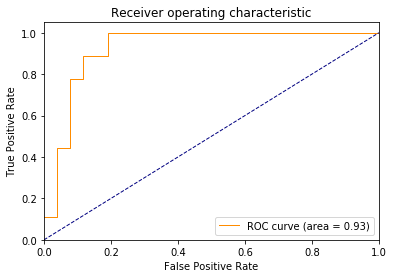

In [6]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Speaker verification using large-scale neural embedding network.

In [1]:
from own_library.speaker_identificationTF import SpeakerIdentificationTf
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

identification = SpeakerIdentificationTf(**{"enrollment_folder": "libri_train/enrollment_folder",
                                            "data_folder": "libri_train",
                                            "model": "tensorflow"})
identification.enroll(seq_len=3.58, num_seq=5, normalize=False)
identification.query(seq_len=3.58, num_seq=2, normalize=False)
identification.compute_smallest_distances()


/home/piotr/anaconda3/envs/pyannote/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Enrolling speaker:  14.wav
Enrolling speaker:  16.wav
Enrolling speaker:  17.wav
Enrolling speaker:  19.wav
Enrolling speaker:  22.wav
Enrolling speaker:  23.wav
Enrolling speaker:  26.wav
Enrolling speaker:  27.wav
Enrolling speaker:  28.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/14.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/16.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/17.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/19.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/22.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/23.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/26.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/27.wav
Computing query embeddings for speaker:  libri_train/enrollment_folder/28.wav
Computing query embeddings for speaker:  libri_train/qu

In [2]:
#pytorch
thresholds_cosine = [0.9, 0.91, 0.92, 0.93, 0.94,  0.95, 0.96, 0.97, 0.98, 0.99, 1]

evaluation = identification.evaluate(thresholds_cosine)
y_true = evaluation[0]["y_true"]
y_prob = []


for i in range(len(identification.smallest_distances)):
    y_prob.append(identification.smallest_distances[i]["Distance"])
print(y_true, y_prob)
print(len(y_prob))
print(len(y_true))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0.9898, 0.9536, 0.9852, 0.9869, 0.9928, 0.9848, 0.9915, 0.9892, 0.9777, 0.8049, 0.9217, 0.9193, 0.9463, 0.7963, 0.8537, 0.9355, 0.9247, 0.7995, 0.9131, 0.9125, 0.8927, 0.9089, 0.8831, 0.7832, 0.8534, 0.8269, 0.9526, 0.7375, 0.8156, 0.8783, 0.9105, 0.8595, 0.8439, 0.9206, 0.9149]
35
35


/home/piotr/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/piotr/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/piotr/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 432x288 with 0 Axes>

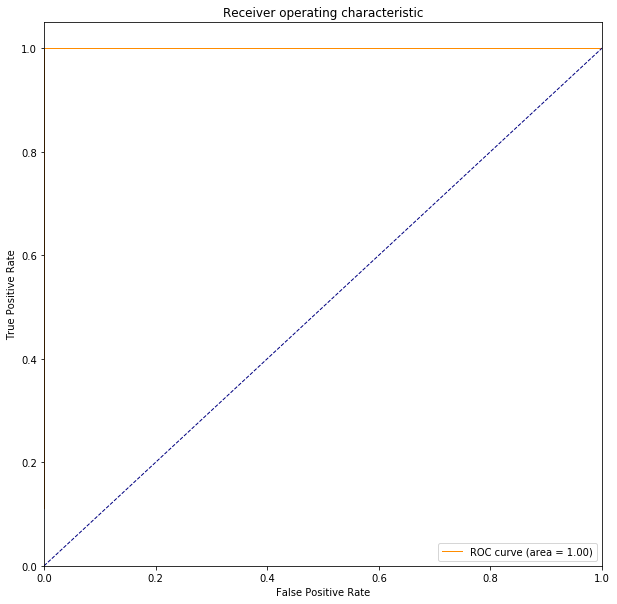

In [3]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()